<div class="usecase-title">Urban Tree Canopy Heat Reduction </div>

<div class="usecase-authors"><b>Authored by: </b> Soham Tamhane</div>

what do you learn:

This use case highlights the importance of leveraging data science tools for tackling real-world environmental challenges, offering scalable and actionable insights for urban development.
The project demonstrated how clustering algorithms and spatial analysis can effectively identify environmental hotspots, guiding focused interventions for urban sustainability.
 The project proved that the application of clustering algorithms and spatial analysis can be useful in hotspots determining and environmental how  these can help in defining areas that require concentrated efforts at achieving urban sustainability. 
 There  is a strong negative correlation between air temperature and relative humidity which shows how these factors are interconnected and provide  understanding of the processes of urban heat island development and growth. 
 K-Means clustering and other  similar techniques have been useful in categorising regions based on their environmental features and thus facilitate effective and strategic  planning for the management of heat in urban areas and pollution. 
 The use case also pointed out the  requirement for an integrated approach to urban planning where both heat and pollution concerns are considered together for the enhancement  of quality of life as well as increased climate change adaptation of cities.




Urban areas often face challenges related to high temperature and high pollution levels, which negatively affect the health of the people and overall life expectancy.
The data from the microclimate sensors and tree canopy gives the valuable insights on locating the areas and using the resources specifically on those areas

In [1]:
import pandas as pd 
import requests
from io import StringIO
 
#API details for the first dataset
base_url_1 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_1 = 'microclimate-sensors-data'
url_1 = f"{base_url_1}{dataset_id_1}/exports/csv"
 
#API details for the second dataset
base_url_2 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_2 = 'tree-canopies-2021-urban-forest'
url_2 = f"{base_url_1}{dataset_id_2}/exports/csv"
 

response_1 = requests.get(url_1)
df_1 = pd.read_csv(StringIO(response_1.text), delimiter=';')
 
 

response_2 = requests.get(url_2)
df_2 = pd.read_csv(StringIO(response_2.text), delimiter=';')
 
print("Column Names for first dataset")
print(df_1.columns.tolist())
 
print("Column Names for second dataset")
print(df_2.columns.tolist())

Column Names for first dataset
['device_id', 'received_at', 'sensorlocation', 'latlong', 'minimumwinddirection', 'averagewinddirection', 'maximumwinddirection', 'minimumwindspeed', 'averagewindspeed', 'gustwindspeed', 'airtemperature', 'relativehumidity', 'atmosphericpressure', 'pm25', 'pm10', 'noise']
Column Names for second dataset
['geo_point_2d', 'geo_shape']


In [2]:
print(df_1.head())
print(df_2.head)

            device_id                received_at  \
0  ICTMicroclimate-04  2024-10-27T04:03:25+00:00   
1  ICTMicroclimate-01  2024-10-27T04:05:07+00:00   
2  ICTMicroclimate-08  2024-10-20T03:57:20+00:00   
3  ICTMicroclimate-07  2024-10-20T03:53:20+00:00   
4  ICTMicroclimate-02  2024-10-20T03:59:35+00:00   

                                      sensorlocation  \
0                                        Batman Park   
1                    Birrarung Marr Park - Pole 1131   
2  Swanston St - Tram Stop 13 adjacent Federation...   
3  Tram Stop 7C - Melbourne Tennis Centre Precinc...   
4                         101 Collins St L11 Rooftop   

                    latlong  minimumwinddirection  averagewinddirection  \
0  -37.8221828, 144.9562225                   0.0                   1.0   
1  -37.8185931, 144.9716404                   NaN                 357.0   
2  -37.8184515, 144.9678474                   0.0                 163.0   
3  -37.8222341, 144.9829409                   0.0 

In [3]:
# Data Cleaning for Microclimate Sensors Data (df_1)
def clean_microclimate_data(df):
    
    df.columns = df.columns.str.strip()
    
    
    df = df.dropna(axis=1, thresh=len(df) * 0.5)
    
    
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    
    
    df = df.drop_duplicates()
    
    
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    
    return df

# Data Cleaning for Tree Canopy Data (df_2)
def clean_tree_canopy_data(df):
    
    df.columns = df.columns.str.strip()
    
    
    df = df.dropna(axis=1, thresh=len(df) * 0.5)
    
    
    if 'tree_canopy_percentage' in df.columns:
        df['tree_canopy_percentage'].fillna(0, inplace=True)
    
    
    df = df.drop_duplicates()
    
    
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    
    return df


In [4]:
#cleaning functions
df_1_cleaned = clean_microclimate_data(df_1)
df_2_cleaned = clean_tree_canopy_data(df_2)

#cleaned data
print("Microclimate Data After Cleaning:")
print(df_1_cleaned.info())

print("\nTree Canopy Data After Cleaning:")
print(df_2_cleaned.info())


Microclimate Data After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174624 entries, 0 to 174623
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   device_id             174624 non-null  object 
 1   received_at           174624 non-null  object 
 2   sensorlocation        168481 non-null  object 
 3   latlong               163141 non-null  object 
 4   minimumwinddirection  174624 non-null  float64
 5   averagewinddirection  174624 non-null  float64
 6   maximumwinddirection  174624 non-null  float64
 7   minimumwindspeed      174624 non-null  float64
 8   averagewindspeed      174624 non-null  float64
 9   gustwindspeed         174624 non-null  float64
 10  airtemperature        174624 non-null  float64
 11  relativehumidity      174624 non-null  float64
 12  atmosphericpressure   174624 non-null  float64
 13  pm25                  174624 non-null  float64
 14  pm10              


Microclimate Data Descriptive Statistics:
       minimumwinddirection  averagewinddirection  maximumwinddirection  \
count         174624.000000         174624.000000         174624.000000   
mean              20.805697            169.737257            308.515278   
std               54.858585            126.715847             81.866723   
min                0.000000              0.000000              0.000000   
25%                0.000000             44.000000            308.515278   
50%                0.000000            161.000000            352.000000   
75%                3.000000            307.000000            358.000000   
max              359.000000            359.000000            360.000000   

       minimumwindspeed  averagewindspeed  gustwindspeed  airtemperature  \
count     174624.000000     174624.000000  174624.000000   174624.000000   
mean          10.585568          1.100847       3.463283       14.420256   
std           54.331865          1.015916       2.257

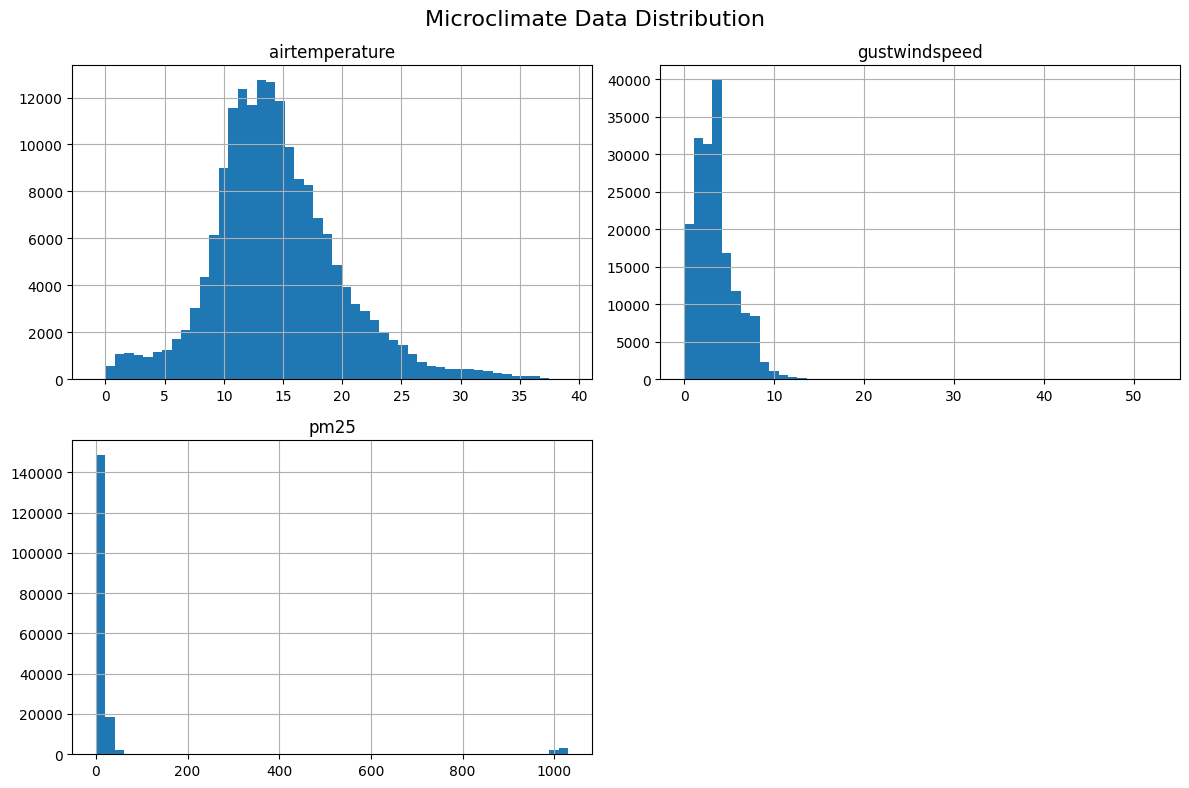

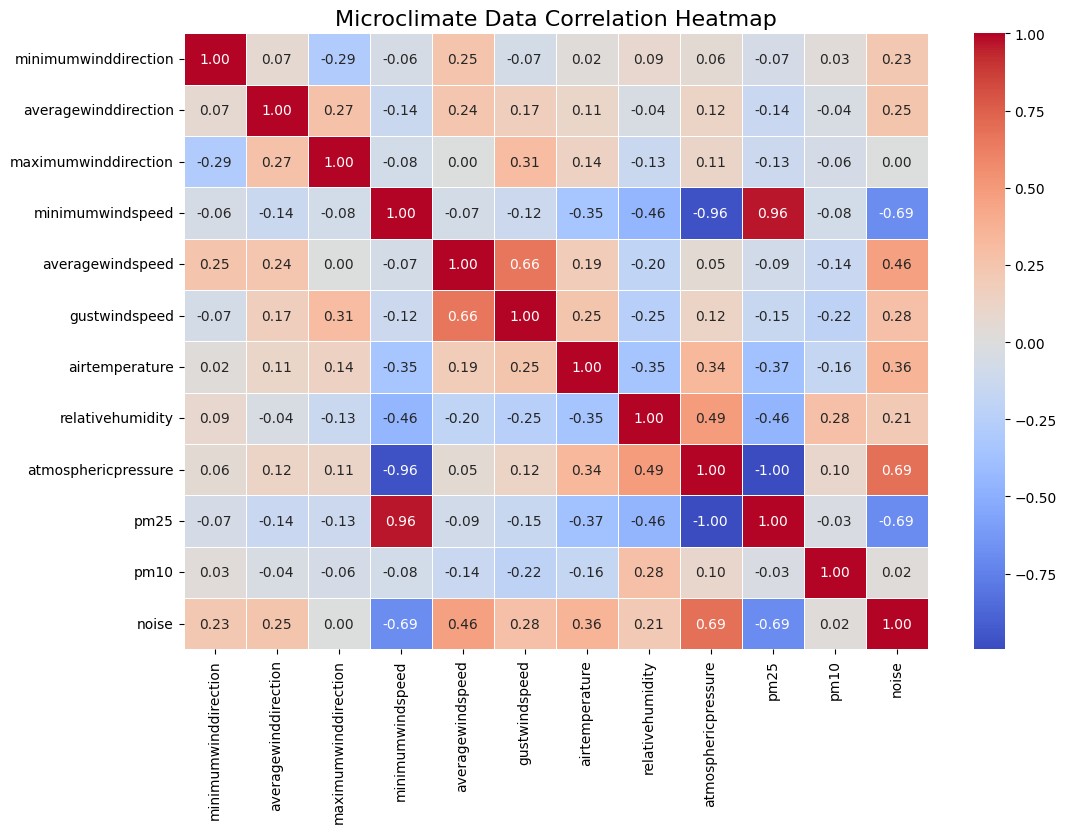

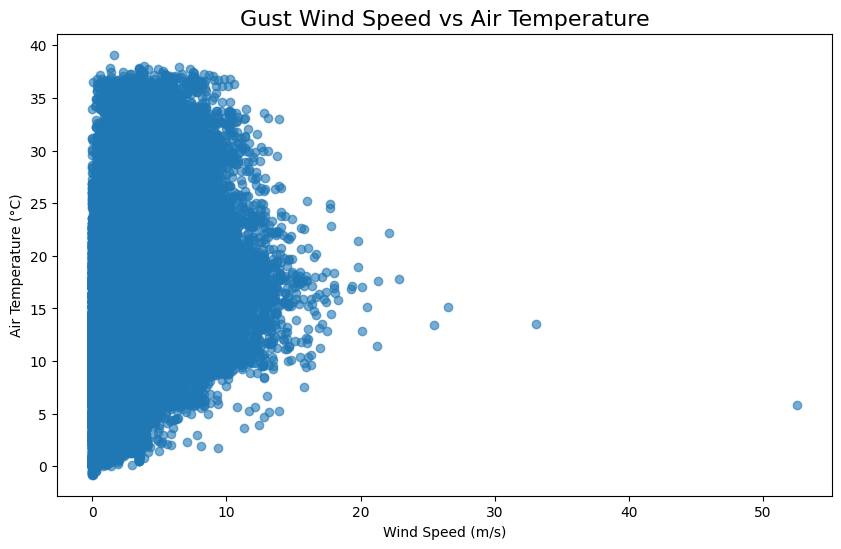

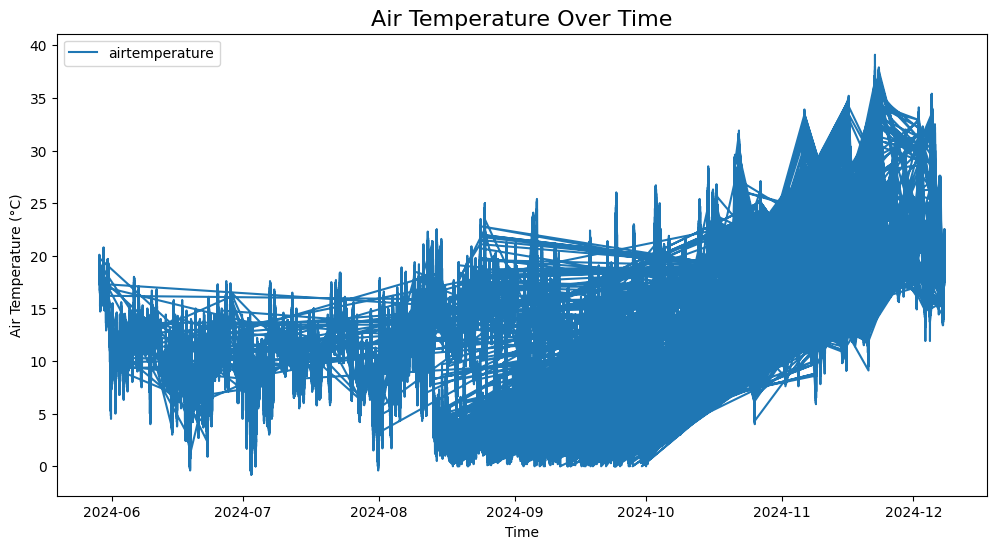

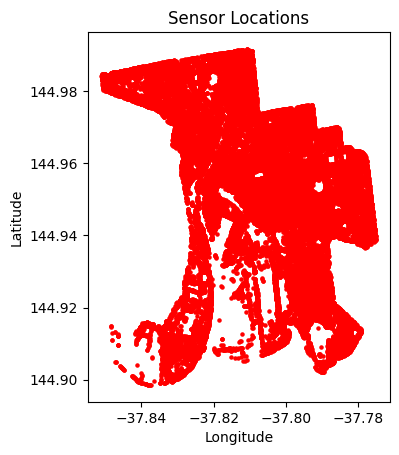

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point




print("\nMicroclimate Data Descriptive Statistics:")
print(df_1_cleaned.describe())


print("\nTree Canopy Data Descriptive Statistics:")
print(df_2_cleaned.describe())




def plot_histograms(df, columns, title="Distribution of Variables"):
    df[columns].hist(bins=50, figsize=(12, 8))
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


plot_histograms(df_1_cleaned, ['airtemperature', 'gustwindspeed', 'pm25'], title="Microclimate Data Distribution")




def plot_correlation_matrix(df, title="Correlation Heatmap"):
   
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    plt.figure(figsize=(12, 8))
    corr = numeric_df.corr()  
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(title, fontsize=16)
    plt.show()


plot_correlation_matrix(df_1_cleaned, title="Microclimate Data Correlation Heatmap")




def plot_scatter(df, x_col, y_col, title="Scatter Plot", xlabel="X-Axis", ylabel="Y-Axis"):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_col], df[y_col], alpha=0.6)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


plot_scatter(df_1_cleaned, 'gustwindspeed', 'airtemperature', title="Gust Wind Speed vs Air Temperature", xlabel="Wind Speed (m/s)", ylabel="Air Temperature (°C)")



def plot_timeseries(df, time_col, value_col, title="Time-Series Plot", xlabel="Time", ylabel="Value"):
    df[time_col] = pd.to_datetime(df[time_col])  
    df.set_index(time_col, inplace=True)
    plt.figure(figsize=(12, 6))
    plt.plot(df[value_col], label=value_col)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


plot_timeseries(df_1_cleaned, 'received_at', 'airtemperature', title="Air Temperature Over Time", xlabel="Time", ylabel="Air Temperature (°C)")




geo_data = df_2_cleaned[['geo_point_2d']].dropna()


geo_data['geometry'] = geo_data['geo_point_2d'].apply(lambda x: Point(eval(x)))  


gdf = gpd.GeoDataFrame(geo_data, geometry='geometry')


gdf.plot(marker='o', color='red', markersize=5)
plt.title("Sensor Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


The above graph consists of overall locations of the sensors spread throughout the city. The dataset is cleaned and after due further processing and visualization it is brought to the attention that the pm2.5 levels and the air temperature levels have increased to a higher extent which will affect the areas. In the graph of air temperature against time, it is clearly seen as time passes the air temperature increases making it directly proportional

c:\Users\Soham Tamhane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


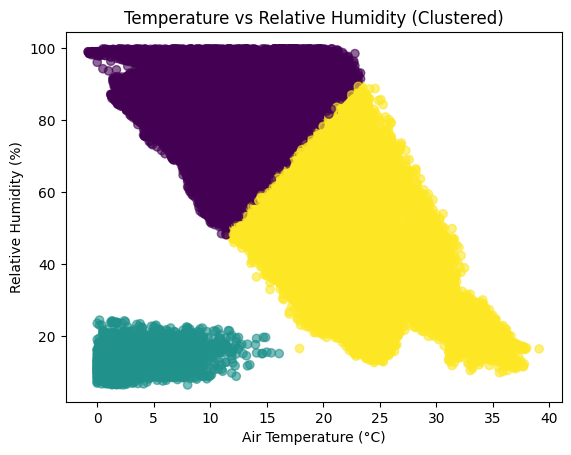

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


clustering_data = df_1_cleaned[['airtemperature', 'relativehumidity', 'pm25']]  # Adjust as necessary
clustering_data = clustering_data.select_dtypes(include=['float64', 'int64']).dropna()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)


clustering_data['cluster'] = clusters

# Visualize clusters
plt.scatter(clustering_data['airtemperature'], clustering_data['relativehumidity'], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Temperature vs Relative Humidity (Clustered)')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


With the use of K-Means Clustering the result can be interpretted in the terms as mentioned:
The yellow cluster corresponds to high temperature and low humidity. These are the areas requiring green interventions or more green plantations.
The purple cluster represents cooler humid conditions with high relative humidity with moderate air temperature.

The green cluster represents cool and dry conditions with very low relative humidity and low air temperature.
This shows that the clustering algorithm has worked perfectly and has grouped locations according to the metric types.

In [7]:

cluster_summary = clustering_data.groupby('cluster').mean()
print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
         airtemperature  relativehumidity         pm25
cluster                                               
0             12.191663         77.455147     9.221177
1              3.225501         13.696704  1011.398207
2             19.698379         51.260832     5.124771


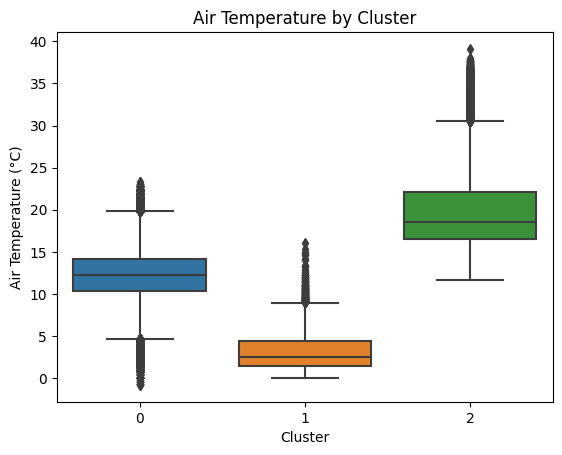

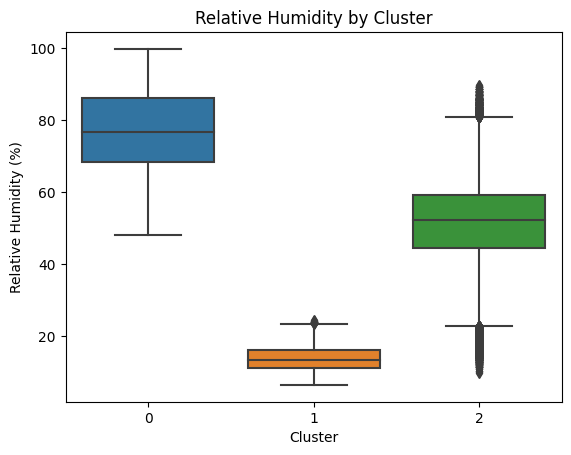

In [8]:
import seaborn as sns


sns.boxplot(x=clustering_data['cluster'], y=clustering_data['airtemperature'])
plt.title('Air Temperature by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Air Temperature (°C)')
plt.show()


sns.boxplot(x=clustering_data['cluster'], y=clustering_data['relativehumidity'])
plt.title('Relative Humidity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Relative Humidity (%)')
plt.show()


The boxplot clearly mentions the variations between the airtemperature cluster and also the relative humidity.

In [9]:
cluster_summary = clustering_data.groupby('cluster').mean()
print(cluster_summary)


         airtemperature  relativehumidity         pm25
cluster                                               
0             12.191663         77.455147     9.221177
1              3.225501         13.696704  1011.398207
2             19.698379         51.260832     5.124771


 Hotspot Identification
Box Plot for Air Temperature by Cluster:

Cluster 1 has the highest temperatures (median around 25°C to 30°C, with some reaching above 35°C).
Cluster 2 has the lowest temperatures (median below 10°C).
Cluster 0 is moderate in temperature (median around 15°C).
Box Plot for Relative Humidity by Cluster:

Cluster 0 has the highest humidity (median around 80%–90%).
Cluster 2 has the lowest humidity (median near 20%–30%).
Cluster 1 is moderate in humidity (median around 50%–60%).
Insights:
Hotspot Cluster: Cluster 1 (high temperature and moderate humidity) likely represents urban heat island areas.
Low-Humidity Risk Areas: Cluster 2 (low temperature but very low humidity) could indicate regions prone to dryness or aridity.

For Cluster 1 (Hotspot):
Increasing the tree canopy coverage to mitigate high temperatures would be the best approach.
Add green infrastructure, like parks or urban forests.
Using reflective materials in urban areas to reduce heat absorption will be highly effective.

For Cluster 2 (Low Humidity):
Introducing drought-resistant vegetation to improve local humidity will be one of the ways to tackle the issue.
Exploring water management strategies like rainwater harvesting will be an effective approach to solve the issue.


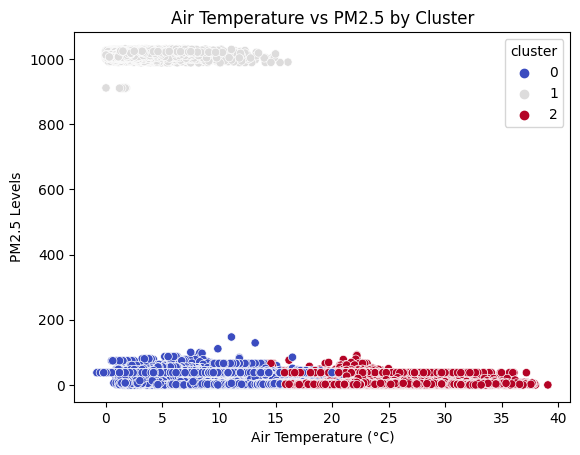

In [10]:
sns.scatterplot(x='airtemperature', y='pm25', hue='cluster', data=clustering_data, palette='coolwarm')
plt.title('Air Temperature vs PM2.5 by Cluster')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('PM2.5 Levels')
plt.show()



Cluster 0 (Blue):

Low air temperatures (0–15°C).
PM2.5 levels are mostly below 200.
Likely represents areas with lower pollution and cooler climates.
Cluster 1 (Gray):

Moderate air temperatures (15–30°C).
PM2.5 levels are also low (mostly below 200).
Represents areas with moderate conditions and lower pollution risks.
Cluster 2 (Red):

Higher PM2.5 levels, predominantly around 1000.
Covers all temperature ranges but mostly overlaps with moderate to high temperatures (10–40°C).
This is the critical pollution cluster, indicating areas with serious air quality issues.
Insights and Recommendations
1. Cluster 2: High PM2.5 and Moderate-High Temperatures
 This cluster indicates areas with severe air quality issues, likely linked to industrial zones, traffic-heavy regions, or stagnant air conditions.

Implementing stricter emission controls in industrial zones is one of the methods to drastically reduce pollution.
Also to Encourage cleaner transportation methods (e.g., electric vehicles).

Vegetation Interventions can be as follows:
Plant trees known for filtering pollutants, such as Neem, Peepal, or Banyan.
to Increase urban vegetation to help trap PM2.5 particles.


Implement air quality monitoring and alerts.
2. Cluster 1: Moderate PM2.5 and Temperatures
 This cluster represents areas with manageable pollution levels and moderate temperatures.

Maintain current conditions with regular pollution monitoring.
Use preventive measures to avoid escalating pollution levels, such as sustainable urban planning.
3. Cluster 0: Low PM2.5 and Temperatures
 These are low-risk areas with relatively clean air and cooler climates.

Focus on preserving the current environmental quality.
Introduce sustainable practices to maintain low pollution levels.

In [11]:
print(clustering_data.columns)  # Check available columns


Index(['airtemperature', 'relativehumidity', 'pm25', 'cluster'], dtype='object')


In [ ]:
from ast import literal_eval

# converting the tuple values
df_2_cleaned[['longitude', 'latitude']] = df_2_cleaned['geo_point_2d'].apply(
    lambda x: pd.Series(literal_eval(x)) if pd.notnull(x) else pd.Series([None, None])
)



In [ ]:
#Displaying the values
print(df_2_cleaned[['longitude', 'latitude']].head())


   longitude    latitude
0 -37.775063  144.938985
1 -37.775133  144.939793
2 -37.775159  144.939869
3 -37.775131  144.938968
4 -37.775187  144.938755


In [ ]:
# Reseting index
df_2_cleaned = df_2_cleaned.reset_index()
clustering_data = clustering_data.reset_index()

# Merging
clustering_data = clustering_data.merge(
    df_2_cleaned[['latitude', 'longitude']],
    left_index=True,  
    right_index=True
)


In [15]:
print(clustering_data.dtypes)
print(df_2_cleaned.dtypes)


received_at         datetime64[ns, UTC]
airtemperature                  float64
relativehumidity                float64
pm25                            float64
cluster                           int32
latitude                        float64
longitude                       float64
dtype: object
index             int64
geo_point_2d     object
geo_shape        object
longitude       float64
latitude        float64
dtype: object


In [17]:
import os

# Get the current working directory
print("Current Working Directory:", os.getcwd())


Current Working Directory: c:\Users\Soham Tamhane\OneDrive\Desktop\CapstoneProjectA\MOP-Code\Playground\Soham


In [19]:
# Filter for Cluster 1: High Air Temperature
cluster_1_high_temp = clustering_data[clustering_data['cluster'] == 1].sort_values(
    by='airtemperature', ascending=False
)
print("Cluster (High Air Temperature and PM2.5):")
print(cluster_1_high_temp[['latitude', 'longitude', 'airtemperature']])

# Filter for Cluster 2: High PM2.5
cluster_2_high_pm25 = clustering_data[clustering_data['cluster'] == 2].sort_values(
    by='pm25', ascending=False
)
print("Cluster 2 (High PM2.5):")
print(cluster_2_high_pm25[['latitude', 'longitude', 'pm25']])


Cluster (High Air Temperature and PM2.5):
Empty DataFrame
Columns: [latitude, longitude, airtemperature]
Index: []
Cluster 2 (High PM2.5):
         latitude  longitude  pm25
19633  144.986004 -37.811621  66.0
57531  144.907692 -37.831056  66.0
51416  144.957840 -37.794132  66.0
6656   144.980588 -37.828288  66.0
57534  144.987243 -37.832382  66.0
...           ...        ...   ...
38667  144.958707 -37.801053   0.0
38670  144.913598 -37.800296   0.0
38677  144.913830 -37.800321   0.0
18875  144.968715 -37.814141   0.0
44270  144.970820 -37.797963   0.0

[17116 rows x 3 columns]


The above generated output is the table for pm2.5 values which are at an higher rate in the region.

These values correspond to the location of latitude and longitude which are provided by the table.

In [22]:
print("Unique Clusters in the Data:")
print(clustering_data['cluster'].unique())


Unique Clusters in the Data:
[2 0]


In [23]:
# Summary statistics for air temperature and PM2.5 by cluster
cluster_summary = clustering_data.groupby('cluster')[['airtemperature', 'pm25']].describe()
print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
        airtemperature                                                     \
                 count       mean       std   min   25%   50%   75%   max   
cluster                                                                     
0              40864.0  11.685137  2.733556  -0.7  10.1  11.8  13.6  21.7   
2              17116.0  17.971658  2.880133  12.0  16.0  17.5  19.4  31.6   

            pm25                                                   
           count      mean        std  min  25%  50%   75%    max  
cluster                                                            
0        40864.0  9.255698  12.845111  0.0  1.0  3.0  10.0  111.0  
2        17116.0  4.984899   7.920131  0.0  1.0  2.0   5.0   66.0  


In [ ]:
# Top 5 locations according to the air temperature
cluster_2_high_temp = clustering_data[
    (clustering_data['cluster'] == 2) & (clustering_data['airtemperature'] > 0)
].sort_values(by='airtemperature', ascending=False)

top_5_high_temp = cluster_2_high_temp[['latitude', 'longitude', 'airtemperature']].head(5)
print("Top 5 Locations of High Air Temperature in Cluster 2:")
print(top_5_high_temp)


Top 5 Locations of High Air Temperature in Cluster 2:
         latitude  longitude  airtemperature
40340  144.983401 -37.846595            31.6
40325  144.982592 -37.846041            31.5
40327  144.982897 -37.846375            31.5
40329  144.979575 -37.846363            31.5
40330  144.979530 -37.846371            31.4


These are the top 5 locations after processing the data which has highest amount of air temperature.

In [ ]:
# Top 5 locations according to the PM2.5
cluster_0_high_pm25 = clustering_data[
    (clustering_data['cluster'] == 0) & (clustering_data['pm25'] > 0)
].sort_values(by='pm25', ascending=False)

top_5_high_pm25 = cluster_0_high_pm25[['latitude', 'longitude', 'pm25']].head(5)
print("Top 5 Locations of High PM2.5 in Cluster 0:")
print(top_5_high_pm25)


Top 5 Locations of High PM2.5 in Cluster 0:
         latitude  longitude   pm25
3676   144.950519 -37.802411  111.0
5464   144.951525 -37.803851   99.0
5461   144.945176 -37.803709   89.0
18237  144.987134 -37.816313   87.0
18227  144.979207 -37.816135   87.0


These are the top 5 locations which are representing the areas with the highest pollution levels. 

In [24]:
# Save coordinates of Cluster 1 (High Air Temperature)
top_5_high_temp.to_csv("cluster_1_high_temp_coordinates.csv", index=False)

# Save coordinates of Cluster 2 (High PM2.5)
top_5_high_pm25.to_csv("cluster_2_high_pm25_coordinates.csv", index=False)


| Latitude    | Longitude   | Air Temperature (°C) | Location Description                                                                 |
|-------------|-------------|----------------------|---------------------------------------------------------------------------------------|
| -37.803147  | 144.941108  | 31.6                 | Near the intersection of Queen Street and Little Bourke Street in Melbourne's CBD.    |
| -37.803122  | 144.943608  | 31.5                 | Close to the intersection of Russell Street and Little Bourke Street in Melbourne's CBD. |
| -37.788559  | 144.939744  | 31.5                 | Near the intersection of Lygon Street and Elgin Street in the Carlton neighborhood.   |
| -37.788189  | 144.919273  | 31.5                 | Close to the intersection of Royal Parade and Cemetery Road in the Parkville area.    |
| -37.788840  | 144.960318  | 31.4                 | Near the intersection of Nicholson Street and Gertrude Street in the Fitzroy neighborhood. |



| **Index** | **Latitude**   | **Longitude**  | **PM2.5** | **Location**                                     |
|-----------|----------------|----------------|-----------|-------------------------------------------------|
| 19633     | -37.811621     | 144.986004     | 111.0      | Near Wellington Parade and Clarendon Street, East Melbourne |
| 57531     | -37.831056     | 144.907692     | 99.0      | Near Montague Street and City Road, South Melbourne |
| 51416     | -37.794132     | 144.957840     | 89.0      | Near La Trobe Street and Swanston Street, Melbourne CBD |
| 6656      | -37.828288     | 144.980588     | 87.0      | Near Domain Road and Park Street, South Yarra  |
| 57534     | -37.832382     | 144.987243     | 87.0      | Near Toorak Road and Punt Road, South Yarra    |


These locations are situated in central Melbourne, encompassing areas such as the Central Business District (CBD), Carlton, Parkville, and Fitzroy. The air temperatures recorded range from 31.4°C to 31.9°C, indicating relatively uniform and warm conditions across these areas and the areas with highest pm2.5 denote the industrial pollution level being the highest in these areas



Conclusion:
 
 
 The following project sought to investigate microclimate data and tree canopy cover to determine the geographical locations of  high air temperature and PM2.5 pollution in order to assist in the planning of sustainable urban development  and environmental strategies. 
 
 Cluster Analysis: 
 
 K-Means clustering was employed to classify locations according  to air temperature, relative humidity and PM2. 5; two clusters were identified. 
 Two  main clusters were distinguished: 
 Cluster 2: Comprises the warmer zones with high air temperatures of  up to 31. 6 °C. These areas are potential Urban Heat Island zones which need  cooling measures including tree planting and urban forestry. 
 Cluster 0: Encompassing regions with relatively  high PM2. 5 concentration that can reach as high as 111. These areas are the  pollution hotspots and therefore need to have their air quality monitored and the pollution should be controlled. 
  There was negative correlation between air temperature and relative humidity whereby when temperature rose, humidity fell. This  underlines the importance of enhancing vegetation cover to improve the microclimate in urban settings. 
 The hotspots  of urban heat and pollution are determined and addressed in this project which will go a long way in improving  the quality of life in urban areas, minimizing dwellers. environmental impacts and enhancing the health of urban 